<center><h3>Linear Regression on Combined Cycle Power Plant Data Set</h3></center>
<center><font size=\"4\">Name: Jiahao Liu<br>Github: Julius-JiahaoLiu</font></center>

In [96]:
! pip install pandas openpyxl
! pip install statsmodels
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
import copy 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler 

#### 1 (b). Explore the data
(i) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [97]:
# There are five sheets in the data. All of them are shuffled versions of the same dataset. Work with Sheet 1
df = pd.read_excel('../data/Folds5x2_pp.xlsx', sheet_name = 'Sheet1', header = 0)
print('Number of rows and columns:', df.shape)
print('Each row is a sample of the dataset.\nEach column is a feature of the dataset, i.e. Average Temperature, Vacuum, Ambient Pressure, Relative Humidity and Energy Output')

Number of rows and columns: (9568, 5)
Each row is a sample of the dataset.
Each column is a feature of the dataset, i.e. Average Temperature, Vacuum, Ambient Pressure, Relative Humidity and Energy Output


(ii) Make pairwise scatterplots of all the variables in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

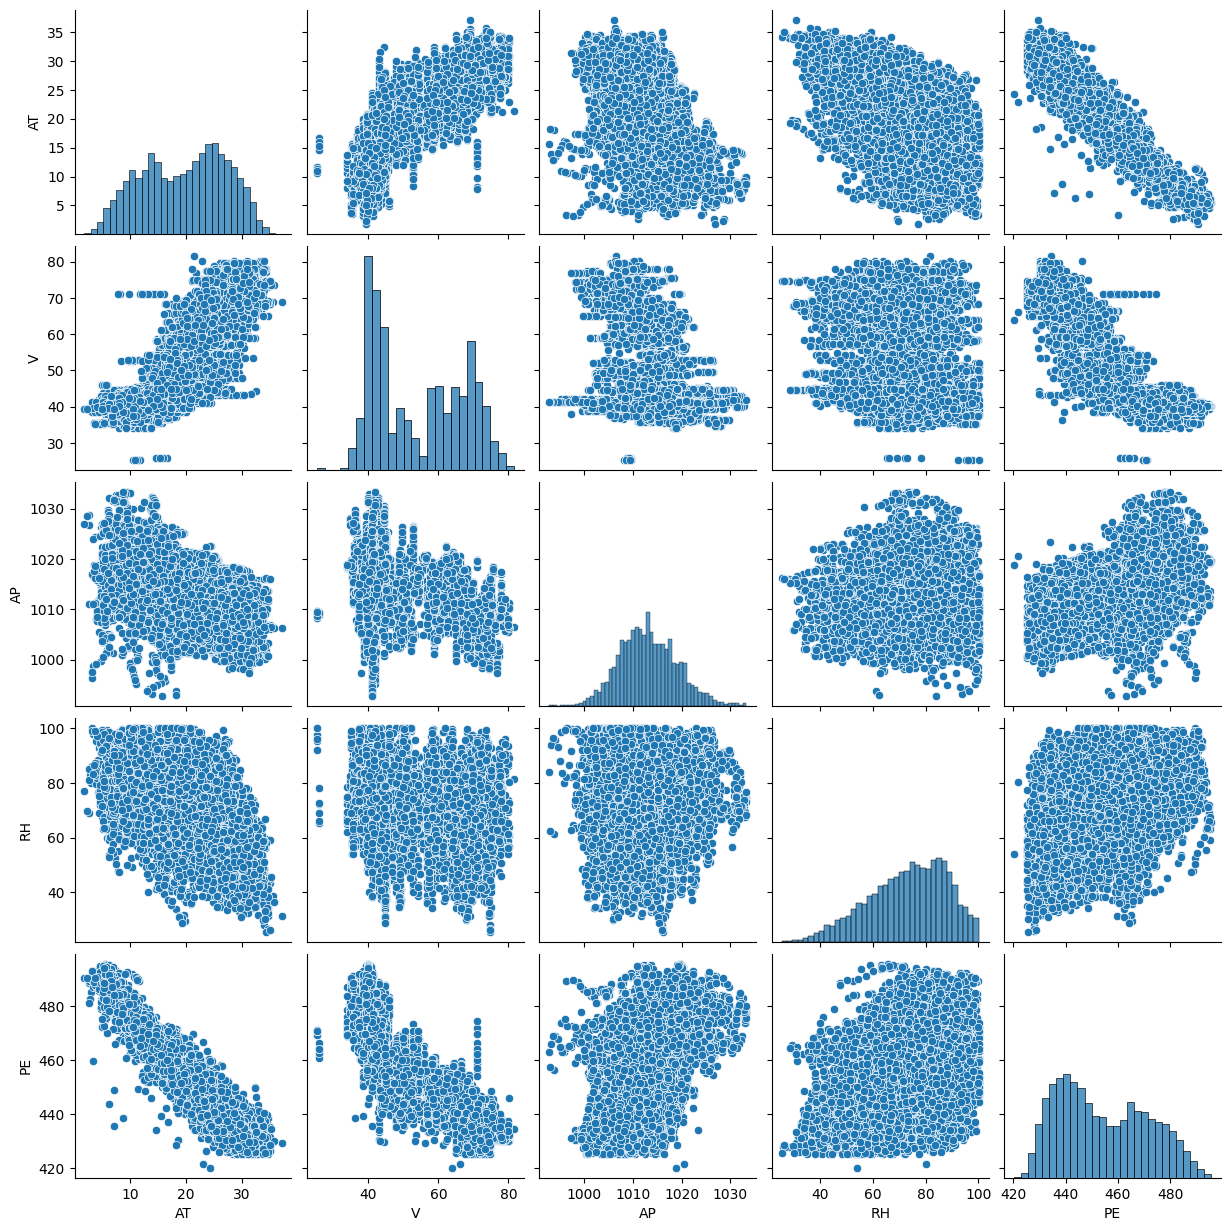

In [98]:
sns.pairplot(df)
plt.show()

We can see there are obvious **correlations between variables**, i.e. a positive correlation between Average Temperature and Vacuum (AT, V), a negative correlation between Average Temperature and Energy Output (AT, PE), and a negative correlation between Vacumm and Energy Output (V, PE).

(iii) What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [99]:
stats = df.describe().T
stats['range'] = stats['max'] - stats['min']
stats['Q1'] = df.quantile(0.25)
stats['Q3'] = df.quantile(0.75)
stats['IQR'] = stats['Q3'] - stats['Q1']
stats['mean'] = df.mean()
stats['median'] = df.median()
statsTable = stats[['mean', 'median', 'range', 'Q1', 'Q3', 'IQR']]
print(statsTable)

           mean    median  range         Q1       Q3      IQR
AT    19.651231    20.345  35.30    13.5100    25.72  12.2100
V     54.305804    52.080  56.20    41.7400    66.54  24.8000
AP  1013.259078  1012.940  40.41  1009.1000  1017.26   8.1600
RH    73.308978    74.975  74.60    63.3275    84.83  21.5025
PE   454.365009   451.550  75.50   439.7500   468.43  28.6800


#### 1 (c). For each predictor, fit a simple linear regression model to predict the response. 
Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

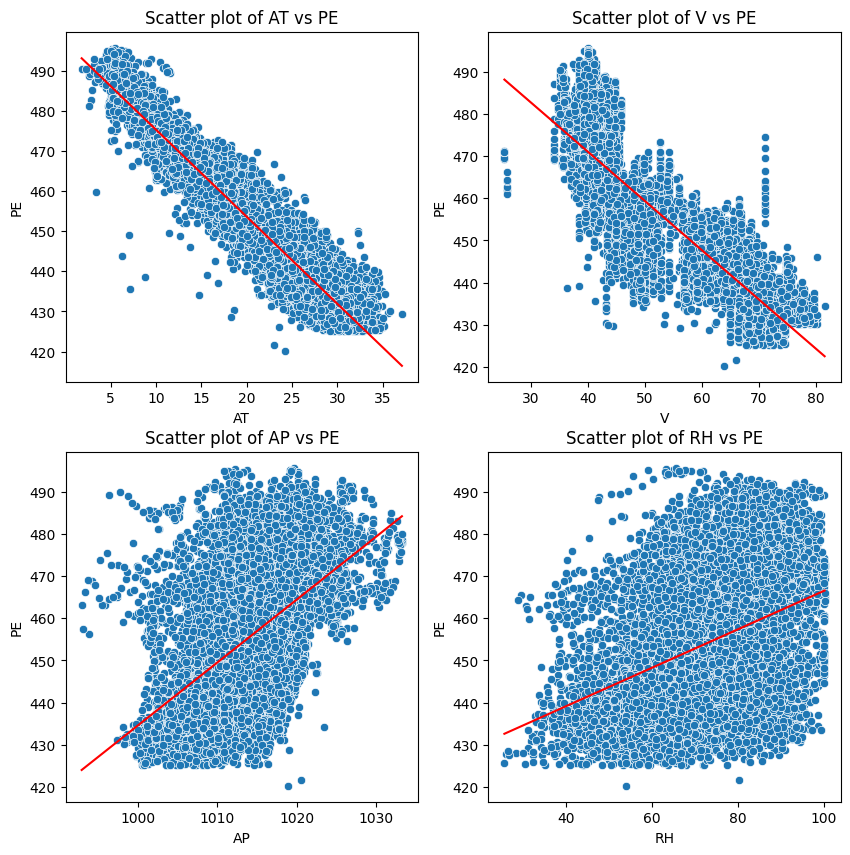

,Predictor,R-squared,P-value of predictor
0,AT,0.898948,0.0
1,V,0.756518,0.0
2,AP,0.268769,0.0
3,RH,0.151939,0.0


In [100]:
predictors = ['AT', 'V', 'AP', 'RH']
results = []
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()
simpleRegressionCoefficients = []
for i, predictor in enumerate(predictors):
    X = sm.add_constant(df[predictor]) # adding intercept
    y = df['PE']
    model = sm.OLS(y, X).fit()
    results.append({
        'Predictor': predictor,
        'R-squared': model.rsquared,
        'P-value of predictor': model.pvalues[predictor]
    })
    simpleRegressionCoefficients.append(model.params[predictor])
    sns.scatterplot(x=predictor, y='PE', data=df, ax=axes[i])
    sns.lineplot(x=df[predictor], y=model.predict(X), color='red', ax=axes[i])
    axes[i].set_title(f'Scatter plot of {predictor} vs PE')
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('PE')

plt.show()
pd.DataFrame(results)

we can see from the above 4 simple regression model that all 4 predictors are statistically significant to the response PE. 

However, base on the R-squared difference, we can see AT and V can capture a a large portion of variability of PE and can explain a larger portion of PE, while AP and RH can only explain a little.

**Are there any outliers that you would like to remove from your data for each of these regression tasks?**

Base on the above scatter plot for 4 simple regression models, we can see there are obvious outliers in each of them.

-- AT vs. PE plot have outliers with huge deviation under the regression line.

-- V vs. PE plot have outliere with V equals 43 and 70.

-- AP vs. PE plot have several outliers when AP is smaller than 1000

-- RH vs. PR plot have serveral outliers when RH is around 60 and PE is over 490

#### 1 (d). Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis $H_0: \beta_j = 0$ ?

In [101]:
X = df[predictors]
y = df['PE']
multipleRegressionCoefficients = []
X = sm.add_constant(X) # adding intercept
model = sm.OLS(y, X).fit()
for predictor in predictors:
    multipleRegressionCoefficients.append(model.params[predictor])
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:18:52   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

we can see from the multiple regression result that all 4 predictors can reject their null hypothesis $H_0: \beta_j = 0$, because their P-values are all relatively small.

#### 1 (e). How do your results from 1(c) compare to your results from 1(d)? 
Create a plot displaying the univariate regression coefficients from 1(c) on the x-axis, and the multiple regression coefficients from 1(d) on the y-axis. (That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.)

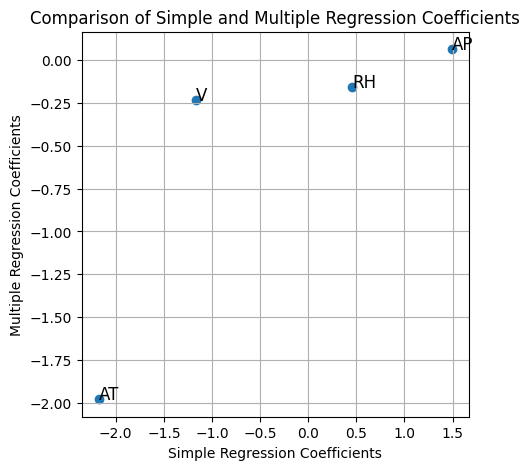

In [102]:
plt.figure(figsize=(5, 5))
plt.scatter(simpleRegressionCoefficients, multipleRegressionCoefficients)
for i, predictor in enumerate(predictors):
    plt.text(simpleRegressionCoefficients[i], multipleRegressionCoefficients[i], predictor, fontsize=12)
plt.xlabel('Simple Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients')
plt.title('Comparison of Simple and Multiple Regression Coefficients')
plt.grid(True)
plt.show()

We can easily see from the above plot that the coefficient of RH change from **positive correlation** with RE in simple regression to **negative correlation** in multiple regression, because there are correlation between 4 predictors, which affect the influence of RH.

#### 1 (f). Is there evidence of nonlinear association between any of the predictors and the response? 
To answer this question, for each predictor X, fit a model of the form 
$$Y = \beta_0 + \beta_1 X + \beta_2X^2 + \beta_3X^3 + \epsilon$$

In [103]:
nonlinearRegressionResult = {}
for predictor in predictors:
    X = df[predictor]
    XPloy = pd.DataFrame({
        'const': np.ones(X.shape),
        'X': X,
        'X^2': X**2,
        'X^3': X**3
    })
    y = df['PE']
    model = sm.OLS(y, XPloy).fit()
    nonlinearRegressionResult[predictor] = {
        'R-squared': model.rsquared,
        'P-value of const': model.pvalues['const'],
        'P-value of X': model.pvalues['X'],
        'P-value of X^2': model.pvalues['X^2'],
        'P-value of X^3': model.pvalues['X^3']
    }
pd.DataFrame(nonlinearRegressionResult).T

,R-squared,P-value of const,P-value of X,P-value of X^2,P-value of X^3
AT,0.911883,0.000000e+00,7.898147e-07,8.833045e-73,3.652185e-110
V,0.775022,0.000000e+00,2.526589e-05,7.684969e-01,1.373489e-02
AP,0.274863,4.502734e-17,4.502735e-17,3.666705e-17,8.264146e-18
RH,0.153743,0.000000e+00,3.772510e-04,9.395430e-06,1.440279e-05


We can judge base on the P-value of $X^2$ and $X^3$ that AT, AP and RH all have nonlinear association with PE, while the V also have a nonlinear association with PE with $X^3$ statistically significant.

#### 1 (g). Is there evidence of association of interactions of predictors with the response? 
To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [110]:
interactions = pd.DataFrame(index=df.index)
for i, predictor1 in enumerate(predictors):
    for j, predictor2 in enumerate(predictors):
        if i < j: interactions[f'{predictor1}*{predictor2}'] = df[predictor1] * df[predictor2]
X = pd.concat([df[predictors], interactions], axis=1)
X = sm.add_constant(X) # adding intercept
model = sm.OLS(df['PE'], X).fit()
for predictor in X.columns:
    print(f'P-value of {predictor}: {model.pvalues[predictor]}')

P-value of const: 3.2316069390265627e-18
P-value of AT: 0.06701872693333641
P-value of V: 1.3712507867003488e-08
P-value of AP: 0.04735731753889247
P-value of RH: 0.0422521332865618
P-value of AT*V: 3.3333576158899544e-117
P-value of AT*AP: 0.45205088337003974
P-value of AT*RH: 1.2169442667201611e-10
P-value of V*AP: 2.8770258994255956e-07
P-value of V*RH: 0.08619365980364321
P-value of AP*RH: 0.03360557262186495


We can conclude from the above model summary that $AT*V, AT*RH, V*AP$ interaction terms are statistically significant given $\alpha=0.01$, while $AT*AP$ is not. $AP*RH, V*RH$ is statistically significant given $\alpha = 0.1$

However, we should notice that the interaction term also affect the influence of signal terms, making $AT$ less significant.

#### 1 (h). Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? 
Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [105]:
trainDf, testDf = train_test_split(df, test_size=0.3, random_state=42)
X_train = sm.add_constant(trainDf[predictors])
y_train = trainDf['PE']
simpleLinearModel = sm.OLS(y_train, X_train).fit()
X_test = sm.add_constant(testDf[predictors])
y_test = testDf['PE']
y_pred = simpleLinearModel.predict(X_test)
trainMSE = mean_squared_error(y_train, simpleLinearModel.predict(X_train))
testMSE = mean_squared_error(y_test, y_pred)
print('First Model (Linear Regression)')
print(f"Train MSE: {trainMSE:.3f}")
print(f"Test MSE: {testMSE:.3f}")

First Model (Linear Regression)
Train MSE: 20.581
Test MSE: 21.240


In [106]:
trainInteractions = pd.DataFrame(index=trainDf.index)
testInteractions = pd.DataFrame(index=testDf.index) 
for i, predictor1 in enumerate(predictors):
    for j, predictor2 in enumerate(predictors):
        if i <= j: 
            trainInteractions[f'{predictor1}*{predictor2}'] = trainDf[predictor1] * trainDf[predictor2]
            testInteractions[f'{predictor1}*{predictor2}'] = testDf[predictor1] * testDf[predictor2]
X_train = pd.concat([trainDf[predictors], trainInteractions], axis=1)
X_test = pd.concat([testDf[predictors], testInteractions], axis=1)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
interactionNonlinearModel = sm.OLS(y_train, X_train).fit()
y_pred = interactionNonlinearModel.predict(X_test)
trainMSE = mean_squared_error(y_train, interactionNonlinearModel.predict(X_train))
testMSE = mean_squared_error(y_test, y_pred)
print('Second Model (Interaction and Nonlinear Regression)')
print(f"Training MSE: {trainMSE:.3f}")
print(f"Test MSE: {testMSE:.3f}")

Second Model (Interaction and Nonlinear Regression)
Training MSE: 17.888
Test MSE: 18.647


In [107]:
threshold = 0.05
truncatedInteractionNonlinearModel = copy.deepcopy(interactionNonlinearModel)
X_train = pd.concat([trainDf[predictors], trainInteractions], axis=1)
X_test = pd.concat([testDf[predictors], testInteractions], axis=1)
while True:
    pValues = truncatedInteractionNonlinearModel.pvalues
    maxPValue = pValues.max()
    if maxPValue > threshold:
        dropColumn = pValues.idxmax()
        X_train = X_train.drop(columns=[dropColumn])
        X_test = X_test.drop(columns=[dropColumn])
        truncatedInteractionNonlinearModel = sm.OLS(y_train, X_train).fit()
    else:
        break
y_pred = truncatedInteractionNonlinearModel.predict(X_test)
trainMSE = mean_squared_error(y_train, truncatedInteractionNonlinearModel.predict(X_train))
testMSE = mean_squared_error(y_test, y_pred)
print(f"Third Model (Truncated Interaction and Nonlinear Regression - removing predictors with p-value > {threshold})")
print(f"Training MSE: {trainMSE:.3f}")
print(f"Test MSE: {testMSE:.3f}")

Third Model (Truncated Interaction and Nonlinear Regression - removing predictors with p-value > 0.05)
Training MSE: 17.975
Test MSE: 18.718


#### 1 (i). Perform k-nearest neighbor regression for this dataset using both normalized and raw features. 
- Find the value of $k\in\{1, 2, \cdots, 100\}$ that gives you the best fit. Plot the train and test errors in terms of $1/k$.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df['PE'], test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
train_errors_raw = []
test_errors_raw = []
train_errors_normalized = []
test_errors_normalized = []
k_values = range(1, 101)
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_errors_raw.append(mean_squared_error(y_train, knn.predict(X_train)))
    test_errors_raw.append(mean_squared_error(y_test, knn.predict(X_test)))
    knn.fit(X_train_normalized, y_train)
    train_errors_normalized.append(mean_squared_error(y_train, knn.predict(X_train_normalized)))
    test_errors_normalized.append(mean_squared_error(y_test, knn.predict(X_test_normalized)))
best_k_normalized = k_values[np.argmin(test_errors_normalized)]
best_k_raw = k_values[np.argmin(test_errors_raw)]
print(f"Best k for raw data: {best_k_raw}, with test MSE: {test_errors_raw[best_k_raw - 1]:.3f}")
print(f"Best k for normalized data: {best_k_normalized}, with test MSE: {test_errors_normalized[best_k_normalized - 1]:.3f}")

Best k for raw data: 5, with test MSE: 15.727
Best k for normalized data: 4, with test MSE: 14.306


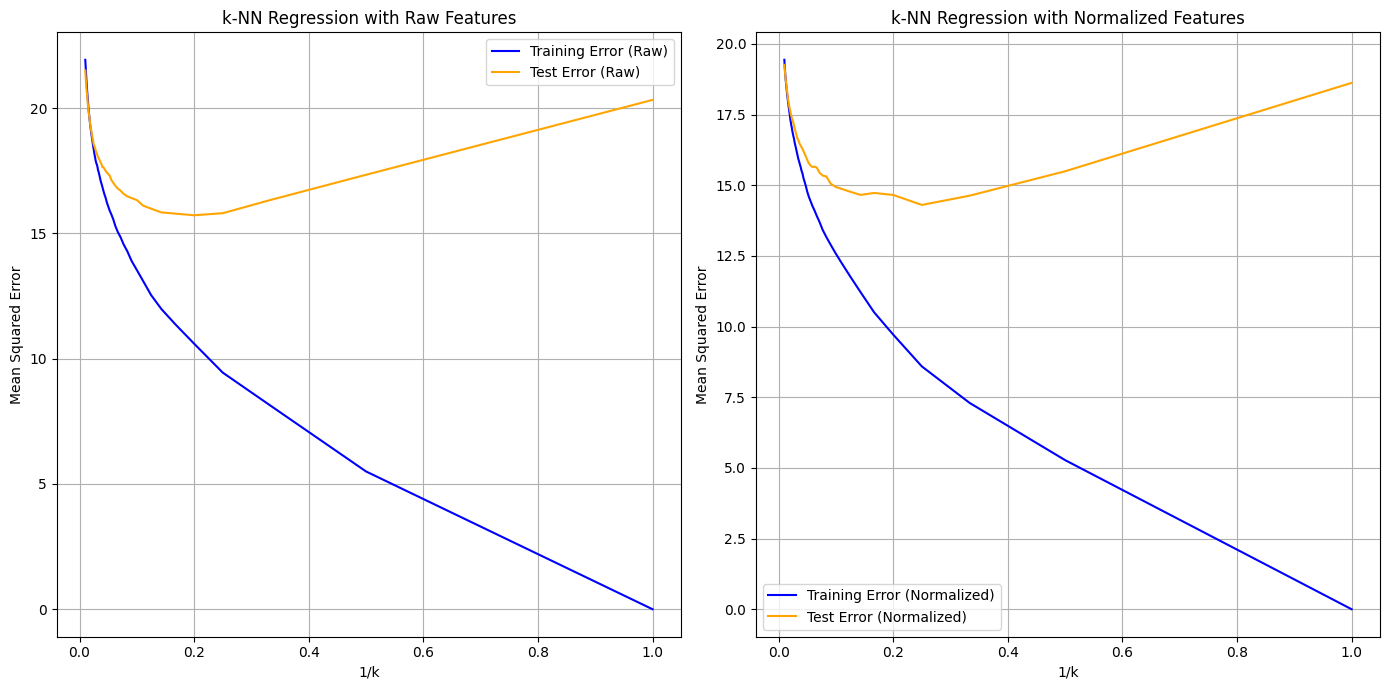

In [109]:
# Plotting train and test errors in terms of 1/k
plt.figure(figsize=(14, 7))
# Raw features 
plt.subplot(1, 2, 1)
plt.plot(1/np.array(k_values), train_errors_raw, label='Training Error (Raw)', color='blue')
plt.plot(1/np.array(k_values), test_errors_raw, label='Test Error (Raw)', color='orange')
plt.title('k-NN Regression with Raw Features')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
# Normalized features 
plt.subplot(1, 2, 2)
plt.plot(1/np.array(k_values), train_errors_normalized, label='Training Error (Normalized)', color='blue')
plt.plot(1/np.array(k_values), test_errors_normalized, label='Test Error (Normalized)', color='orange')
plt.title('k-NN Regression with Normalized Features')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


#### 1 (j). Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

we can see that the **KNN regression using normalized data** yields the lowest test MSE (14.306), outperforming both linear regression models. This indicates that the KNN model fits the data better and generalizes more effectively to unseen data compared to the linear regression models.

However, this comes at the cost of interpretability and increased computational complexity, especially as 
k grows larger.

#### 2. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
(a) The sample size n is extremely large, and the number of predictors p is small.

Expected Performance: Better for inflexible methods

Justification: With a very large sample size and a small number of predictors, inflexible methods can effectively leverage the large amount of data to estimate the model parameters reliably, but might introduce unnecessary complexity, leading to overfitting.

The rigid structure of an inflexible model (e.g., linear regression) allows for robust estimation without overfitting, as the simplicity of the model will generalize well to new data.

(b) The number of predictors p is extremely large, and the number of observations n is small.

Expected Performance: Better for inflexible methods

Justification: When p is much larger than n, flexible methods are at high risk of overfitting because they may model the noise in the small dataset rather than the true underlying relationships.

Inflexible methods, with their constrained flexibility, are less likely to overfit when the sample size is limited. They can provide a more stable estimate of the relationship between predictors and response. Regularization techniques (like Lasso or Ridge regression) can also be applied to inflexible methods to manage the large number of predictors, further enhancing performance under these conditions.

(c) The relationship between the predictors and response is highly non-linear.

Expected Performance: Better for flexible methods

Justification: Flexible methods excel in capturing complex and non-linear relationships due to their adaptability and ability to model intricate interactions between variables, while inflexible methods, such as linear regression, would struggle to fit such a non-linear relationship unless appropriate transformations are applied or polynomial terms are added.

As a result, flexible methods are more likely to provide a better fit and better predictive performance in scenarios where the underlying relationship is complex and non-linear.

(d) The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high.

Expected Performance: Better for inflexible methods

Justification: High variance in the error terms implies that there is significant noise in the data, which can lead to unstable estimates and poor generalization if flexible methods are used. Flexible methods, which adapt closely to the training data, may capture this noise, resulting in overfitting and high variance in predictions.

In contrast, inflexible methods are more robust to noise, as they do not attempt to fit the data too closely. Their simpler structure helps in smoothing out the noise, leading to more stable predictions and better generalization in the presence of high variance.

#### 3. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable. 

<center>

| Obs.  | $X_1$ | $X_2$ | $X_3$ | Y |
| :---: | :---: | :---: | :---: | :-----: |
|   1   |   0   |   3   |   0   |   Red   |
|   2   |   2   |   0   |   0   |   Red   |
|   3   |   0   |   1   |   3   |   Red   |
|   4   |   0   |   1   |   2   |   Green   |
|   5   |  -1   |   0   |   1   |   Green   |
|   6   |   1   |   1   |   1   |   Red   |

</center>

Suppose we wish to use this data set to make a prediction for $Y$ when $X_1 = X_2 = X_3 = 0$ using K-nearest neighbors.

(a) Compute the Euclidean distance between each observation and the test point, $X_1 = X_2 = X_3 = 0$.

The Euclidean distance for three dimension is $d = \sqrt{(X_1^i-X_1)^2 + (X_2^i-X_2)^2 + (X_3^i-X_3)^2}$. With different $(X_1^i, X_2^i, X_3^i)$ and $(X_1, X_2, X_3)=(0, 0, 0)$, we can get the distance for observations are:

<center>

| Obs.  | $X_1$ | $X_2$ | $X_3$ | Euclidean Distance |
| :---: | :---: | :---: | :---: | :-----: |
|   1   |   0   |   3   |   0   |   $\sqrt{9} = 3$   |
|   2   |   2   |   0   |   0   |   $\sqrt{4} = 2$   |
|   3   |   0   |   1   |   3   |   $\sqrt{10}$   |
|   4   |   0   |   1   |   2   |   $\sqrt{5}$   |
|   5   |  -1   |   0   |   1   |   $\sqrt{2}$   |
|   6   |   1   |   1   |   1   |   $\sqrt{3}$   |

</center>

(b) What is our prediction with $K=1$? Why?

We simply choose the nearest neighbor to make prediction, i.e. obs.5 with Y = Green, so predict point (0, 0, 0) as green.

(c) What is our prediction with $K=3$? Why?

We look at the three nearest neighbors, i.e. observation 2, 5, 6 with Y = Red, Green, Red, to make prediction. The majority calss among the nearest neighbors is Red, so predict (0, 0, 0) as Red.

(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

we would expect the best value of **K to be small**. Because a small value of K allows the k-nearest neighbors model to be more flexible and adaptive to local structures in the data. This flexibility is crucial when the decision boundary is nonlinear because the model can fit the complex boundary better by focusing on a smaller neighborhood around the test point.

While, larger K would smooth the decision boundary, leading to a more inflexible model. This could cause the model to underfit in cases where the true boundary is highly nonlinear, as it averages over more points, potentially from different classes.